In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('Placement.csv')
df_placed = df[df['status'] == 'Placed'].copy()

In [3]:
numeric_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
df_numeric = df_placed[numeric_cols].dropna()

In [4]:
correlations = {}
for col in numeric_cols:
    if col != 'salary':
        corr, p_val = pearsonr(df_numeric[col], df_numeric['salary'])
        correlations[col] = {
            'correlation': corr,
            'p_value': p_val
        }

In [5]:
for param, values in sorted(correlations.items(), key=lambda x: abs(x[1]['correlation']), reverse=True):
    corr = values['correlation']
    p_val = values['p_value']

In [27]:
if abs(corr) > 0.7:
        strength = "STRONG"
elif abs(corr) > 0.4:
        strength = "MODERATE"
elif abs(corr) > 0.2:
        strength = "WEAK"
else:
        strength = "VERY WEAK"
    
sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
print(f"{param:<20} {corr:>7.4f}{sig:<7} {p_val:>12.6f}  {strength}")

degree_p             -0.0193            0.816157  VERY WEAK


In [28]:
highest = max(correlations.items(), key=lambda x: abs(x[1]['correlation']))
print("\n" + "="*80)
print(f"ANSWER: {highest[0]} has the HIGHEST correlation with salary")
print(f"Correlation Coefficient: {highest[1]['correlation']:.4f}")
print(f"P-value: {highest[1]['p_value']:.6f}")
print("="*80)


ANSWER: etest_p has the HIGHEST correlation with salary
Correlation Coefficient: 0.1783
P-value: 0.030142


In [29]:
fig = plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

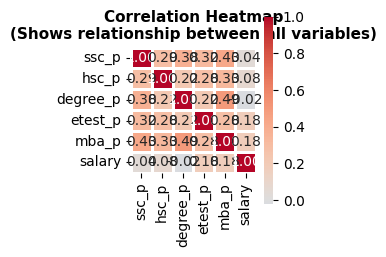

In [30]:
plt.subplot(2, 3, 1)
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1)
plt.title('Correlation Heatmap\n(Shows relationship between all variables)', 
          fontweight='bold', fontsize=11)
plt.tight_layout()

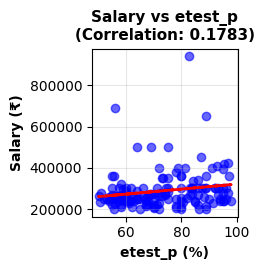

In [31]:
plt.subplot(2, 3, 2)
highest_param = highest[0]
plt.scatter(df_numeric[highest_param], df_numeric['salary'], alpha=0.6, color='blue')
z = np.polyfit(df_numeric[highest_param], df_numeric['salary'], 1)
p = np.poly1d(z)
plt.plot(df_numeric[highest_param], p(df_numeric[highest_param]), "r--", linewidth=2)
plt.xlabel(f'{highest_param} (%)', fontweight='bold')
plt.ylabel('Salary (₹)', fontweight='bold')
plt.title(f'Salary vs {highest_param}\n(Correlation: {highest[1]["correlation"]:.4f})', 
          fontweight='bold', fontsize=11)
plt.grid(True, alpha=0.3)

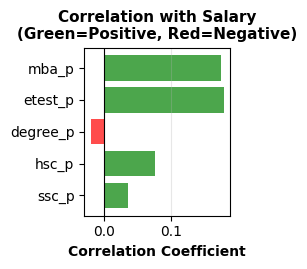

In [32]:
plt.subplot(2, 3, 3)
params = list(correlations.keys())
corrs = [correlations[p]['correlation'] for p in params]
colors = ['green' if c > 0 else 'red' for c in corrs]
bars = plt.barh(params, corrs, color=colors, alpha=0.7)
plt.xlabel('Correlation Coefficient', fontweight='bold')
plt.title('Correlation with Salary\n(Green=Positive, Red=Negative)', 
          fontweight='bold', fontsize=11)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')

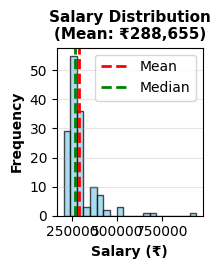

In [33]:
plt.subplot(2, 3, 4)
plt.hist(df_numeric['salary'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Salary (₹)', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title(f'Salary Distribution\n(Mean: ₹{df_numeric["salary"].mean():,.0f})', 
          fontweight='bold', fontsize=11)
plt.axvline(df_numeric['salary'].mean(), color='red', linestyle='--', 
            linewidth=2, label='Mean')
plt.axvline(df_numeric['salary'].median(), color='green', linestyle='--', 
            linewidth=2, label='Median')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

/var/folders/0b/pn0xqpcd7hb0qvhjxrpdhclm0000gn/T/ipykernel_5254/3061763355.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_normalized[col] for col in numeric_cols[:-1]],


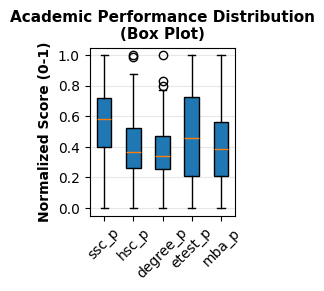

In [34]:
plt.subplot(2, 3, 5)
data_normalized = (df_numeric[numeric_cols[:-1]] - df_numeric[numeric_cols[:-1]].min()) / \
                  (df_numeric[numeric_cols[:-1]].max() - df_numeric[numeric_cols[:-1]].min())
plt.boxplot([data_normalized[col] for col in numeric_cols[:-1]], 
            labels=numeric_cols[:-1], patch_artist=True)
plt.ylabel('Normalized Score (0-1)', fontweight='bold')
plt.title('Academic Performance Distribution\n(Box Plot)', 
          fontweight='bold', fontsize=11)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

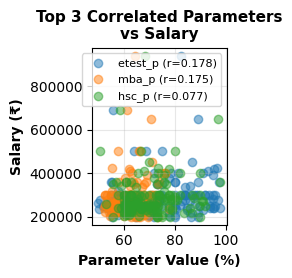

In [35]:
plt.subplot(2, 3, 6)
top_3 = sorted(correlations.items(), key=lambda x: abs(x[1]['correlation']), reverse=True)[:3]
top_3_params = [p[0] for p in top_3]
for i, param in enumerate(top_3_params):
    plt.scatter(df_numeric[param], df_numeric['salary'], 
                alpha=0.5, label=f'{param} (r={correlations[param]["correlation"]:.3f})')
plt.xlabel('Parameter Value (%)', fontweight='bold')
plt.ylabel('Salary (₹)', fontweight='bold')
plt.title('Top 3 Correlated Parameters\nvs Salary', fontweight='bold', fontsize=11)
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('salary_analysis.png', dpi=300, bbox_inches='tight')
plt.show()